In [1]:
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.models import Sequential

2022-12-28 15:54:10.322329: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-28 15:54:10.410550: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-12-28 15:54:10.413977: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-28 15:54:10.413987: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

In [2]:
total_class=6

In [3]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(224,224,3),activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(filters=256,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(total_class,activation='softmax'))

2022-12-28 15:54:11.522740: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-12-28 15:54:11.522755: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-28 15:54:11.522767: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (nsl47): /proc/driver/nvidia/version does not exist
2022-12-28 15:54:11.522924: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 128)      0

In [5]:
import tensorflow as tf

In [6]:
tf.keras.utils.plot_model(model,to_file='CNN_13072021.png',show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


## Visualize with Visual Keras

In [8]:
import visualkeras

In [9]:
visualkeras.layered_view(model).show()
visualkeras.layered_view(model,to_file='cnn_architecture.png')
visualkeras.layered_view(model,to_file='cnn_architecture.png').show()

## Legend

In [10]:
from PIL import ImageFont
font=ImageFont.truetype('arial.ttf',32)
visualkeras.layered_view(model,legend=True,font=font)

OSError: cannot open resource

## Flat Style

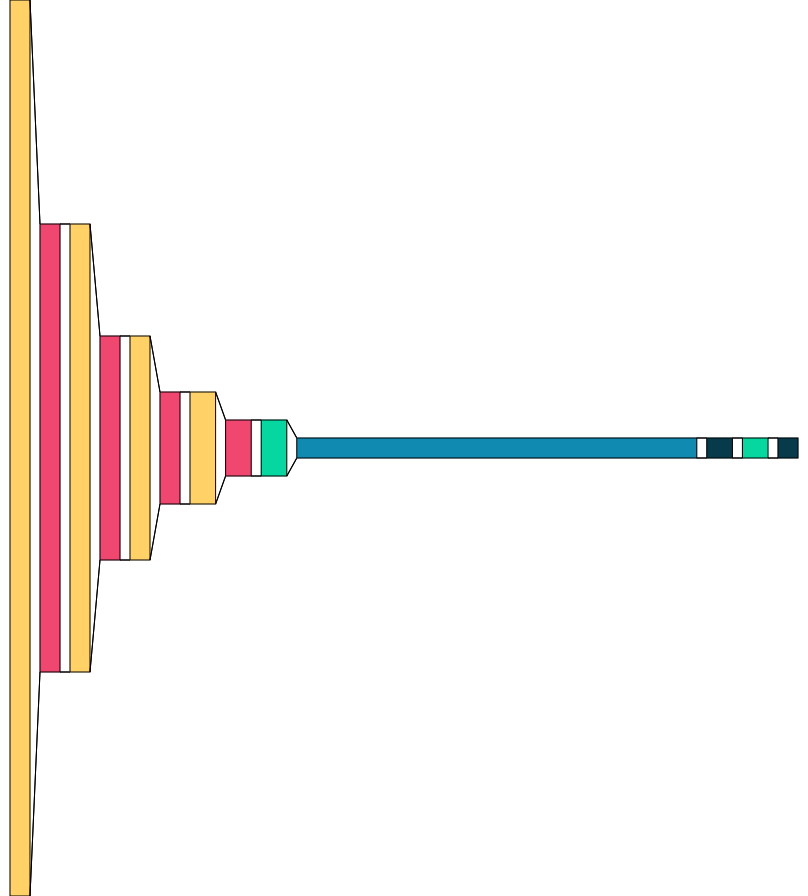

In [11]:
visualkeras.layered_view(model,
                         to_file='flat_cnn.png',
                         draw_volume=False)

## Spacing and logic grouping

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 128)      0

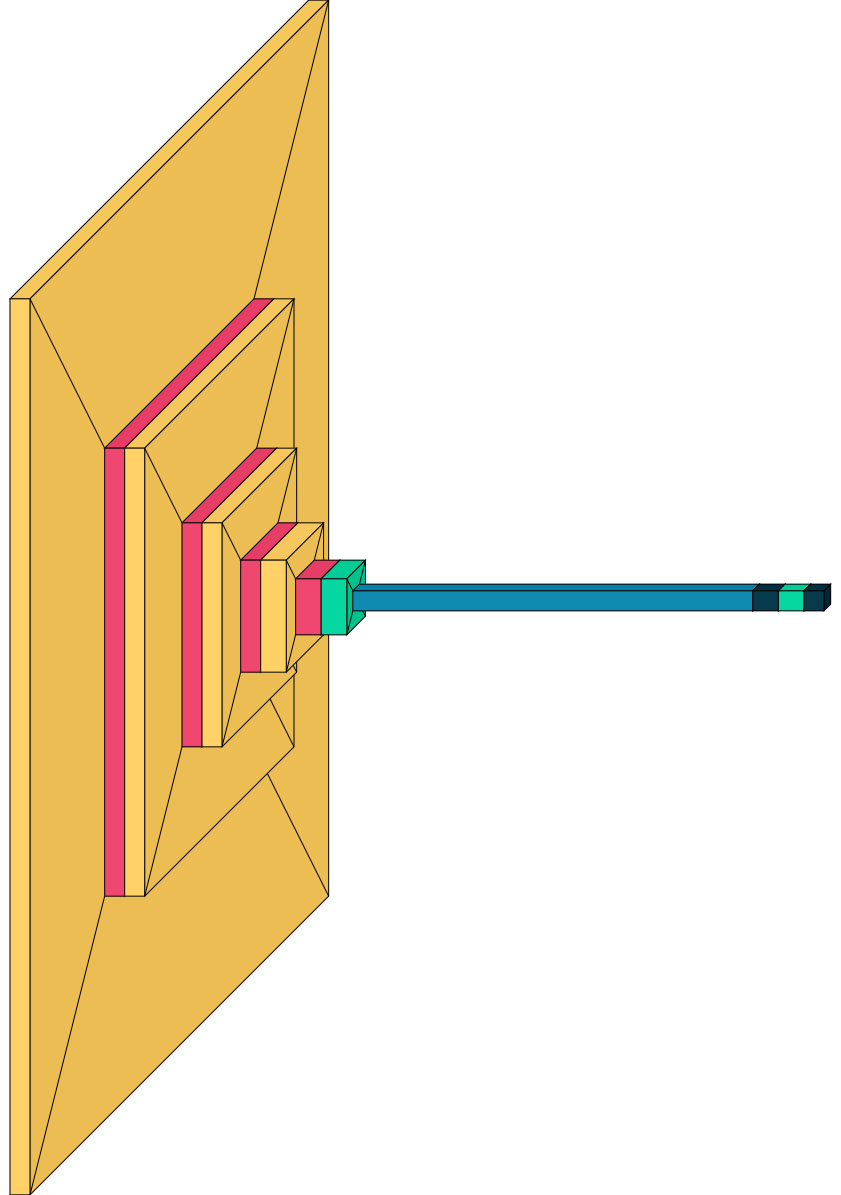

In [13]:
model.add(visualkeras.SpacingDummyLayer(spacing=100))
visualkeras.layered_view(model,spacing=0)

In [14]:
visualkeras.layered_view(model,spacing=100,legend=True,font=font)

NameError: name 'font' is not defined

## Custom Color Map
it is possible to provide a custom color map for fill and outline per layer type

In [ ]:
from collections import defaultdict

In [ ]:
color_map=defaultdict(dict)

In [ ]:
color_map['Conv2D']['fill']='orange'
color_map['MaxPooling2D']['fill']='gray'
color_map['Dense']['fill']='green'
color_map['Dropout']['fill']='pink'
color_map['Flatten']['fill']='teal'

In [ ]:
visualkeras.layered_view(model,color_map=color_map,spacing=100,legend=True,font=font)

## Scaling Dimension

In [ ]:
visualkeras.layered_view(model,
                         to_file='scaling_cnn.png',
                         scale_xy=1,
                         scale_z=1,
                         max_z=100,
                        spacing=10,
                         legend=True,
                         font=font
                        )